In [1]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
#This script reads FASTA file and splits
fasta_file = '../input/sequences.fasta'
sequences = []
headers = []

for record in SeqIO.parse(fasta_file, 'fasta'):
    headers.append(record.id.split('|')[0].split('.')[0])
    sequences.append(str(record.seq))

csv_file = '../input/sequences.csv'
csv_dataset = pd.read_csv(csv_file)
df = csv_dataset[['Accession', 'Release_Date', 'Length', 'Sequence_Type', 'Geo_Location', 'Country']]

In [2]:
# Merge information from both sources based on accession number
merged_df = pd.DataFrame({'Accession': headers, 'Sequence': sequences}).merge(df, on='Accession', how='inner')

#print(merged_df.head())
merged_df.to_csv('../outputs/main_dataset2.csv', index=False)
#This script iterates through each row of the dataset and checks if the
#Release_Date column is empty. If it is empty, it adds the index of that row
#to the list and prints out the indices of records with the empty dates.
empty_dates_indices = []

for i in range(len(merged_df)):
    collection_date = merged_df.at[i, 'Release_Date']

    # Check if the date is empty
    if pd.isna(collection_date) or collection_date is None or collection_date == "":
        # If empty, add the index to the list
        empty_dates_indices.append(i)

In [3]:
# Print indices of records with empty dates
print("Indices of records with empty dates:", empty_dates_indices)
# Sorting 'Release_Date' column in ascending order except first record
sorted_df = pd.concat([merged_df.head(1), merged_df.iloc[1:].sort_values(by='Release_Date')])
sorted_df.to_csv('../outputs/ascending_dates2.csv', index=False)
# Extract 'Country' column
countryName = sorted_df.iloc[:, 6]

Indices of records with empty dates: []


In [4]:
# Extract only the country part from the country names
# If you want to extract 'Geo_Location' column
#countryName = countryName.apply(lambda x: x.split(':')[0].strip())

# Replace NaN values with 'Unknown'
countryName = countryName.fillna('Unknown')

# Find unique country names
unique_country_names = countryName.unique()

# Initialize a dictionary to store country frequencies
country_freq = {}

# Loop through each row of the DataFrame
for country in countryName:
    # Check if the country name is not None or empty
    if country != "":
        # If the country is already in the dictionary, increment its frequency
        if country in country_freq:
            country_freq[country] += 1
        # If the country is not in the dictionary, add it with frequency 1
        else:
            country_freq[country] = 1

Total Frequency: 808
                             Country  Frequency
28                       Philippines          1
18                    Czech Republic          1
16                            Mexico          1
27                             Egypt          1
13                       Switzerland          1
20                      South Africa          1
21                       Netherlands          1
26                             Gabon          1
6                          Singapore          1
5                             Israel          2
4                              Sudan          2
1                              Zaire          2
9                             France          3
15                             Spain          3
2                            Unknown          4
22                          Slovakia          8
25                              Peru          9
23                             Japan         10
17                            Taiwan         10
19                 

<Figure size 1000x600 with 0 Axes>

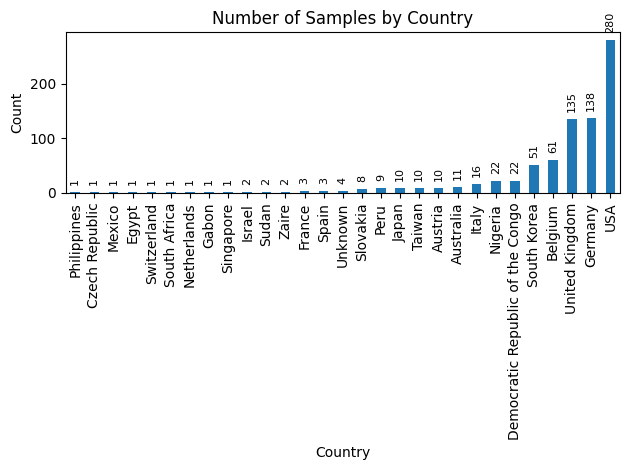

In [5]:
# Convert the dictionary to a DataFrame
country_data = pd.DataFrame(list(country_freq.items()), columns=['Country', 'Frequency'])

country_data.sort_values(by='Frequency', ascending=True, inplace=True)

total_frequency = country_data['Frequency'].sum()
print("Total Frequency:", total_frequency)
print(country_data)

countries = country_data['Country']
x = countries.count()
print('Number of countries:', x)

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = country_data.set_index('Country').plot(kind='bar', legend=False)
plt.title('Number of Samples by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Annotate bars with the frequency values
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(str(height), (x + width / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8, rotation=90, color='black')

plt.tight_layout()
plt.show()


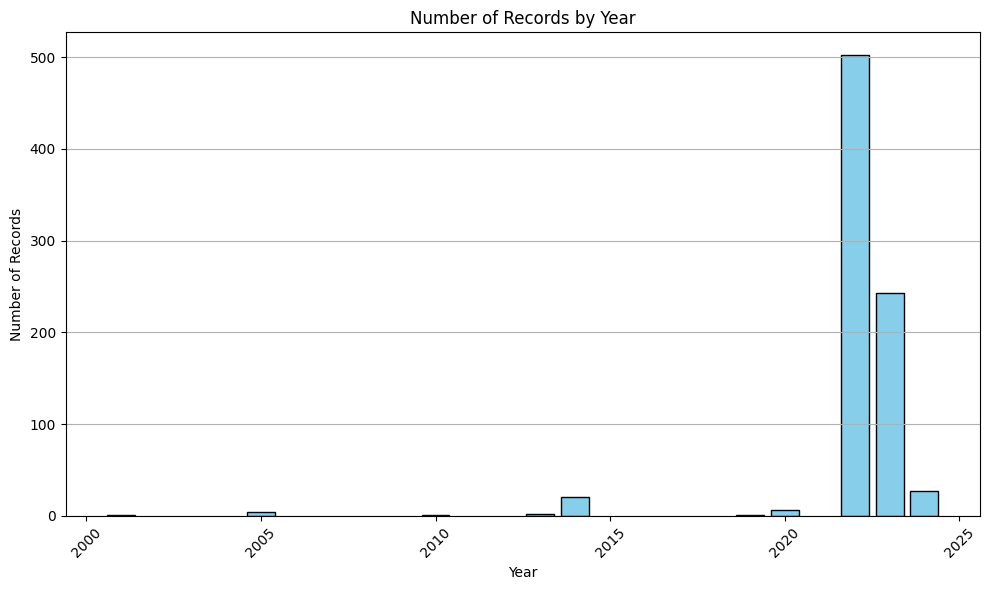

In [6]:
# Load the sorted dataset
sorted_df = pd.read_csv('../outputs/ascending_dates2.csv')

# Convert 'Collection_Date' to datetime format
sorted_df['Release_Date'] = pd.to_datetime(sorted_df['Release_Date'])

# Extract year from 'Collection_Date'
sorted_df['Release_Year'] = sorted_df['Release_Date'].dt.year

# Count the records by collection year
records_by_year = sorted_df['Release_Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(records_by_year.index, records_by_year.values, color='skyblue', edgecolor='black')
plt.title('Number of Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()